In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
Reviewdata = pd.read_csv('/content/train (1).csv')

ParserError: ignored

In [ ]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


Data cleaning


In [ ]:
count=Reviewdata.isnull().sum().sort_values(ascending=False)
percentage=((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,keys=['Count','Percentage'])
print('Count and percentage of missing values for the columns:')
missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


percentage for default
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


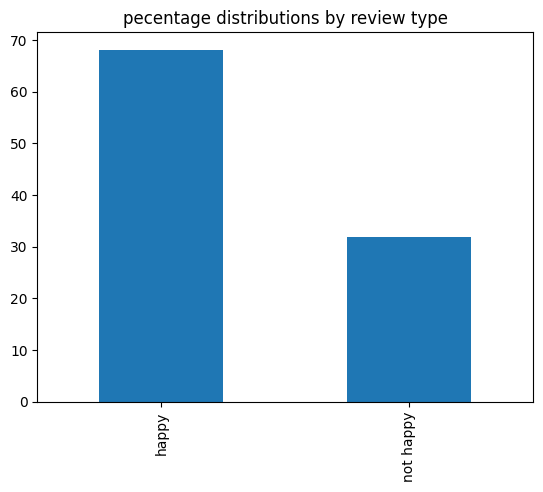

In [ ]:
from ast import increment_lineno
import matplotlib.pyplot as plt
%matplotlib inline
print('percentage for default')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('pecentage distributions by review type')
plt.show()


In [ ]:
Reviewdata.drop(columns=['User_ID','Browser_Used','Device_Used'],inplace=True)

In [ ]:
import re
import string
def text_clean_1(text):
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('[%s]' %re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  return text
cleaned1=lambda x:text_clean_1(x)

In [ ]:
Reviewdata['cleaned_description']=pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    text = text.lower()
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    text = [word for word in text if not any(c.isdigit() for c in word)]
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    text = [t for t in text if len(t) > 0]
    pos_tags = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = [t for t in text if len(t) > 1]
    text = " ".join(text)
    return(text)

Reviewdata["review_clean"] = Reviewdata["cleaned_description"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
Reviewdata["sentiments"] = Reviewdata["Description"].apply(lambda x: sid.polarity_scores(x))
Reviewdata= pd.concat([Reviewdata.drop(['sentiments'], axis=1), Reviewdata['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
def text_clean_2(text):
  text=re.sub('[''""...]','',text)
  text=re.sub('\n','',text)
  return text
cleaned2=lambda x:text_clean_2(x)

In [ ]:
Reviewdata['cleaned_description_new']=pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,review_clean,neg,neu,pos,compound,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,room kind clean strong smell dog generally ave...,0.000,0.675,0.325,0.9628,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,stay crown plaza april april staff friendly at...,0.053,0.897,0.050,-0.1243,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,booked hotel hotwire low price could find got ...,0.048,0.866,0.085,0.9279,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed husband son way alaska cruise love hote...,0.000,0.653,0.347,0.9920,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,girlfriend stay celebrate th birthday plan wee...,0.041,0.871,0.088,0.9088,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,room one nice clearly update recently clean be...,0.044,0.791,0.165,0.9472,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,husband stay hotel time though fancy hotel lov...,0.056,0.852,0.091,0.6705,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,wife stay glorious city back sf expensive find...,0.015,0.710,0.276,0.9948,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,boyfriend stay fairmont recent trip san franci...,0.013,0.815,0.171,0.9469,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location definately pric...,0.111,0.527,0.361,0.9696,wonderful staff great location but it was defi...


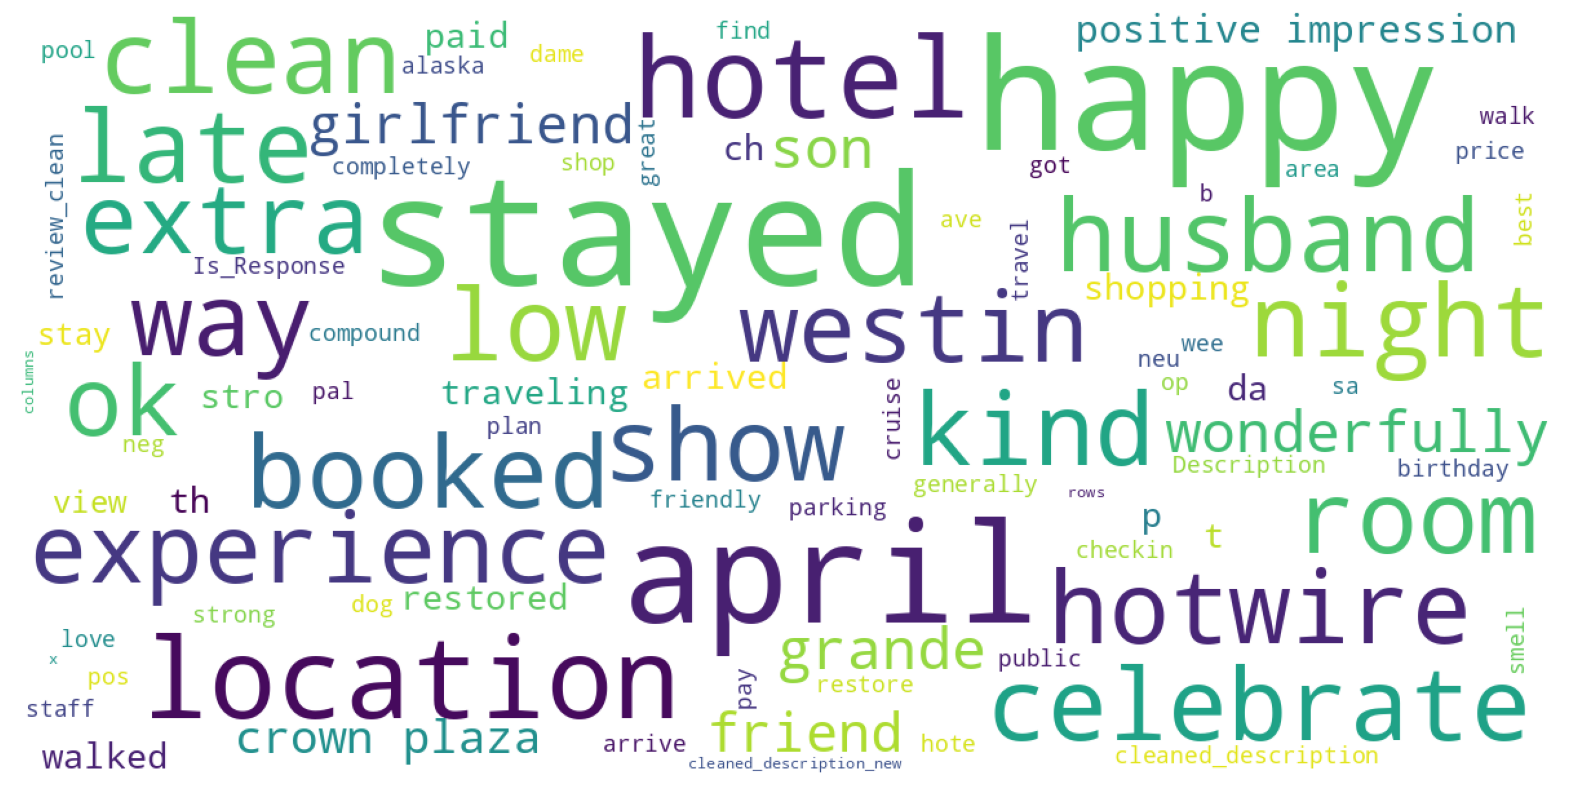

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(Reviewdata))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(Reviewdata["Description"])

Model training


In [ ]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.cleaned_description_new
Dependent_var = Reviewdata.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size=0.1, random_state=225)

print('IV_train:', len(IV_train))
print('IV_test:', len(IV_test))
print('DV_train:', len(DV_train))
print('DV_test:', len(DV_test))



IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2= LogisticRegression(solver="lbfgs")
from sklearn.pipeline import Pipeline

In [ ]:
model=Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(IV_train,DV_train)
from sklearn.metrics import confusion_matrix
predictions= model.predict(IV_test)
confusion_matrix(predictions,DV_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2417,  304],
       [ 154, 1019]])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy : ",accuracy_score(predictions, DV_test))
print("Precision :",precision_score(predictions,DV_test,average='weighted'))
print("Recall: ",recall_score(predictions, DV_test,average='weighted'))

Accuracy :  0.8823831535695943
Precision : 0.8889271415963718
Recall:  0.8823831535695943


In [ ]:
example =["the food was delicious"]
result =model.predict(example)
print(result)

['happy']
